# Bioenergy consumption by feedstock 2002-2018

In [11]:
import pandas as pd
import os
import pyxlsb
import numpy as np
from scipy.stats import linregress

In [7]:
tj_ktoe = 41.868

In [8]:
def get_variable(file, variable, col_start, col_end):
    """Reads variable for fuel in multiple sheets and converts 
    the value from ktoe to TJ.
    """
    trajectory = {}
    for year in range(2002,2019):
        df = pd.read_excel(
            file,
            engine='pyxlsb',
            sheet_name=str(year),
            skiprows=[0,1,2,3],
            index_col=1
            )   
        trajectory[year] = sum(df.loc[variable, col_start:col_end]) * tj_ktoe
    return pd.Series(trajectory)

In [9]:
# Consumption of bioenergy

consumption = pd.DataFrame()

countries = ('CZ', 'AT', 'DK', 'NL', 'PL', 'SK')

for file in os.listdir('Energy-Balances-June-2020-edition'):
    if file.startswith(countries):
        data = get_variable('Energy-Balances-June-2020-edition/' + file, 'Gross inland consumption', 'Bioenergy', 'Bioenergy')
        consumption[f'{file[:2]}'] = data

consumption.to_csv(
    'consumption_bioenergy_2002_2018.csv',
    index_label='Rok',
    decimal=',',
    columns=countries,
    )

consumption

,AT,NL,DK,SK,CZ,PL
2002,121985.976780,62195.918832,69169.201704,11786.511888,72605.182860,164661.610500
2003,126972.078768,59282.366580,78701.707944,14156.952444,71296.179840,166789.635336
2004,128553.433128,68960.322252,86527.339560,15423.082632,76443.013080,172360.172736
2005,154084.413924,88970.462964,94692.562524,16783.122744,78234.461064,178559.986176
2006,179544.847140,92946.331980,96245.321040,18589.643208,82671.003684,187260.282180
2007,197850.750912,92962.534896,106991.831808,23082.958836,88199.924292,190851.928560
2008,207120.242376,106175.866356,110200.427856,24398.744472,96307.620624,221360.093460
2009,216156.780288,118456.336908,112816.801044,31349.837304,107542.521612,247818.282984
2010,236715.517404,119589.829272,134256.273408,36024.190164,115848.714132,286657.551864
2011,234880.568568,124237.512216,131797.198296,38650.779144,125312.096304,310435.017084


In [12]:
result = linregress(consumption.index, consumption['CZ'])

In [13]:
result

LinregressResult(slope=6979.699758705883, intercept=-13911635.503105413, rvalue=0.9841648156818572, pvalue=1.1009685530168265e-12, stderr=324.58146079876155)

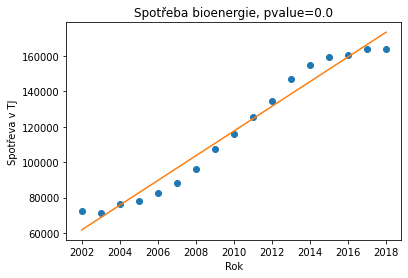

In [16]:
import matplotlib.pyplot as plt

plt.plot(consumption.index, consumption['CZ'], 'o')

fx = np.array([consumption.index.min(), consumption.index.max()])
fy = result.intercept + result.slope * fx
plt.plot(fx, fy, '-')

plt.title(f'Spotřeba bioenergie, pvalue={round(result.pvalue, 3)}')
plt.ylabel('Spotřeva v TJ')
plt.xlabel('Rok')
plt.show()

In [19]:
#  Share of bioenergy on consumption

share = pd.DataFrame()

countries = ('CZ', 'AT', 'DK', 'NL', 'PL', 'SK')

for file in os.listdir('Energy-Balances-June-2020-edition'):
    if file.startswith(countries):
        bioenergy = get_variable('Energy-Balances-June-2020-edition/' + file, 'Gross inland consumption', 'Bioenergy', 'Bioenergy')
        consumption = get_variable('Energy-Balances-June-2020-edition/' + file, 'Gross inland consumption', 'Total', 'Total')
        share[f'{file[:2]}'] = bioenergy / consumption

share.to_csv(
    'share_bioenergy_2002_2018.csv',
    index_label='Rok',
    decimal=',',
    columns=countries,
    )

share

,AT,NL,DK,SK,CZ,PL
2002,0.093980,0.018321,0.083493,0.015100,0.040387,0.044278
2003,0.092918,0.016873,0.089950,0.018233,0.037977,0.043709
2004,0.092347,0.019408,0.101586,0.020174,0.039704,0.045000
2005,0.107058,0.025388,0.114071,0.021437,0.041037,0.046066
2006,0.123628,0.026730,0.108247,0.023948,0.042403,0.045855
2007,0.138591,0.026833,0.122950,0.031050,0.045335,0.046916
2008,0.143882,0.030869,0.129751,0.031910,0.050431,0.053794
2009,0.158249,0.035127,0.139741,0.044863,0.059954,0.062807
2010,0.162319,0.033154,0.157051,0.048580,0.060682,0.067400
2011,0.165885,0.036835,0.166018,0.053686,0.068354,0.072951


In [20]:
#  Share of bioenergy on RES consumption

share_res = pd.DataFrame()

countries = ('CZ', 'AT', 'DK', 'NL', 'PL', 'SK')

for file in os.listdir('Energy-Balances-June-2020-edition'):
    if file.startswith(countries):
        bioenergy = get_variable('Energy-Balances-June-2020-edition/' + file, 'Gross inland consumption', 'Bioenergy', 'Bioenergy')
        res = get_variable('Energy-Balances-June-2020-edition/' + file, 'Gross inland consumption', 'Renewables and biofuels', 'Renewables and biofuels')
        share_res[f'{file[:2]}'] = bioenergy / res

share_res.to_csv(
    'share_res_bioenergy_2002_2018.csv',
    index_label='Rok',
    decimal=',',
    columns=countries,
    )

share_res

,AT,NL,DK,SK,CZ,PL
2002,0.093980,0.018321,0.083493,0.015100,0.040387,0.044278
2003,0.092918,0.016873,0.089950,0.018233,0.037977,0.043709
2004,0.092347,0.019408,0.101586,0.020174,0.039704,0.045000
2005,0.107058,0.025388,0.114071,0.021437,0.041037,0.046066
2006,0.123628,0.026730,0.108247,0.023948,0.042403,0.045855
2007,0.138591,0.026833,0.122950,0.031050,0.045335,0.046916
2008,0.143882,0.030869,0.129751,0.031910,0.050431,0.053794
2009,0.158249,0.035127,0.139741,0.044863,0.059954,0.062807
2010,0.162319,0.033154,0.157051,0.048580,0.060682,0.067400
2011,0.165885,0.036835,0.166018,0.053686,0.068354,0.072951


In [21]:
share_res

,AT,NL,DK,SK,CZ,PL
2002,0.449475,0.951802,0.759884,0.377670,0.884625,0.949469
2003,0.504010,0.927702,0.754382,0.523383,0.925466,0.960364
2004,0.478406,0.910625,0.752412,0.504879,0.901835,0.952780
2005,0.513040,0.935937,0.773344,0.495772,0.889551,0.950589
2006,0.556905,0.916033,0.770871,0.531844,0.884894,0.952649
2007,0.569673,0.875690,0.773312,0.584820,0.898576,0.944996
2008,0.571199,0.862796,0.785100,0.620896,0.902407,0.951017
2009,0.564705,0.854260,0.788939,0.662010,0.891465,0.944736
2010,0.596490,0.861735,0.792634,0.649522,0.870768,0.938687
2011,0.619394,0.844226,0.760028,0.714360,0.855602,0.930762
